### Importação dos dados



In [ ]:

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



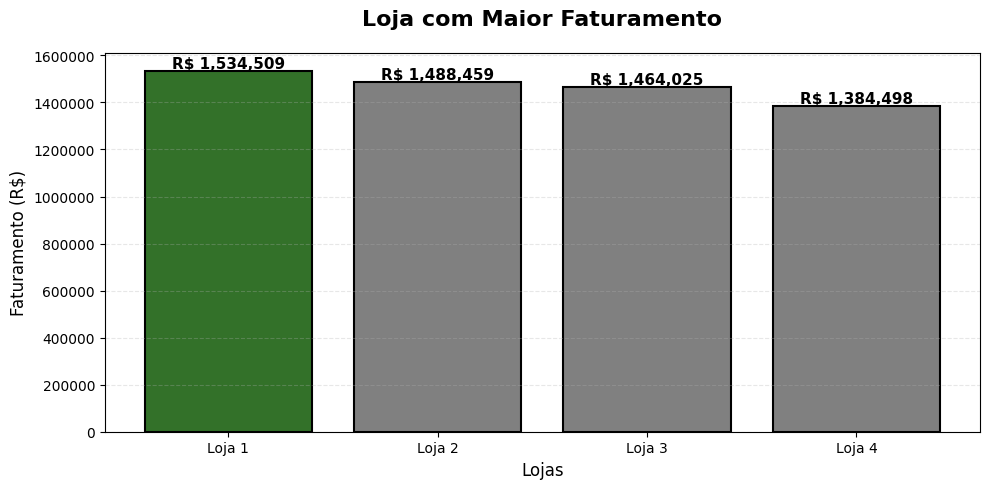

,Preço
Loja,
Loja 1,1534509.12
Loja 2,1488459.06
Loja 3,1464025.03
Loja 4,1384497.58


In [22]:
# ===============================
# IMPORTAÇÃO DE BIBLIOTECAS
# ===============================
import os

import pandas as pd
import matplotlib.pyplot as plt


# ===============================
# CONSOLIDAÇÃO DOS DADOS
# ===============================
# Adiciona a identificação da loja e une todos os DataFrames
df_lojas = pd.concat(
    [
        loja.assign(Loja='Loja 1'),
        loja2.assign(Loja='Loja 2'),
        loja3.assign(Loja='Loja 3'),
        loja4.assign(Loja='Loja 4')
    ],
    ignore_index=True
)


# ===============================
# FATURAMENTO POR LOJA
# ===============================
faturamento_por_loja = (
    df_lojas
    .groupby('Loja', as_index=True)['Preço']
    .sum()
    .sort_values(ascending=False)
)


# ===============================
# GRÁFICO DE COLUNAS
# ===============================
plt.figure(figsize=(10, 5))

cores = ['#337129', '#808080', '#808080', '#808080']
barras = plt.bar(
    faturamento_por_loja.index,
    faturamento_por_loja.values,
    color=cores,
    edgecolor='black',
    linewidth=1.5
)

# Adiciona rótulos de valor sobre cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        altura,
        f'R$ {altura:,.0f}',
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

# Configurações do gráfico
plt.title('Loja com Maior Faturamento', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()


# ===============================
# SALVAMENTO DO GRÁFICO
# ===============================
output_dir = 'graficos'
os.makedirs(output_dir, exist_ok=True)

plt.savefig(os.path.join(output_dir, 'faturamento_por_loja.png'))
plt.show()

faturamento_por_loja


# 2. Vendas por Categoria

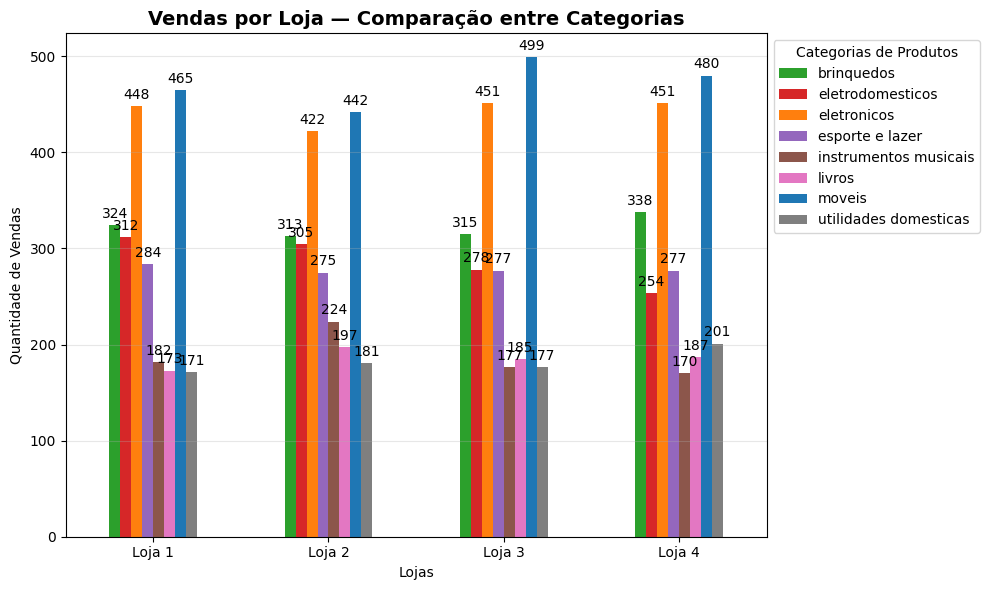

In [4]:
# ===============================
# ANÁLISE DE VENDAS POR CATEGORIA
# ===============================

# Contagem de vendas por categoria em cada loja
vendas_categoria_loja1 = loja['Categoria do Produto'].value_counts()
vendas_categoria_loja2 = loja2['Categoria do Produto'].value_counts()
vendas_categoria_loja3 = loja3['Categoria do Produto'].value_counts()
vendas_categoria_loja4 = loja4['Categoria do Produto'].value_counts()


# ===============================
# CONSOLIDAÇÃO DOS DADOS
# ===============================
vendas_por_categoria = pd.DataFrame({
    'Loja 1': vendas_categoria_loja1,
    'Loja 2': vendas_categoria_loja2,
    'Loja 3': vendas_categoria_loja3,
    'Loja 4': vendas_categoria_loja4
}).fillna(0)


# Transposição para visualização (lojas no eixo X)
vendas_por_categoria_transposto = vendas_por_categoria.T


# ===============================
# DEFINIÇÃO DE CORES POR CATEGORIA
# ===============================
cores_categoria = {
    'moveis': '#1f77b4',                 # azul
    'eletronicos': '#ff7f0e',            # laranja
    'brinquedos': '#2ca02c',             # verde
    'eletrodomesticos': '#d62728',       # vermelho
    'esporte e lazer': '#9467bd',        # roxo
    'instrumentos musicais': '#8c564b',  # marrom
    'livros': '#e377c2',                 # rosa
    'utilidades domesticas': '#7f7f7f'   # cinza
}

# Garante que as cores sigam exatamente a ordem das categorias
cores_barras = [
    cores_categoria.get(categoria, '#333333')
    for categoria in vendas_por_categoria_transposto.columns
]


# ===============================
# GRÁFICO DE BARRAS
# ===============================
ax = vendas_por_categoria_transposto.plot(
    kind='bar',
    figsize=(10, 6),
    color=cores_barras
)

plt.title('Vendas por Loja — Comparação entre Categorias', fontsize=14, fontweight='bold')
plt.xlabel('Lojas')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

plt.legend(
    title='Categorias de Produtos',
    loc='upper left',
    bbox_to_anchor=(1, 1)
)

# Adiciona rótulos de valor nas barras
for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.0f',
        label_type='edge',
        padding=3
    )

plt.tight_layout()
plt.show()


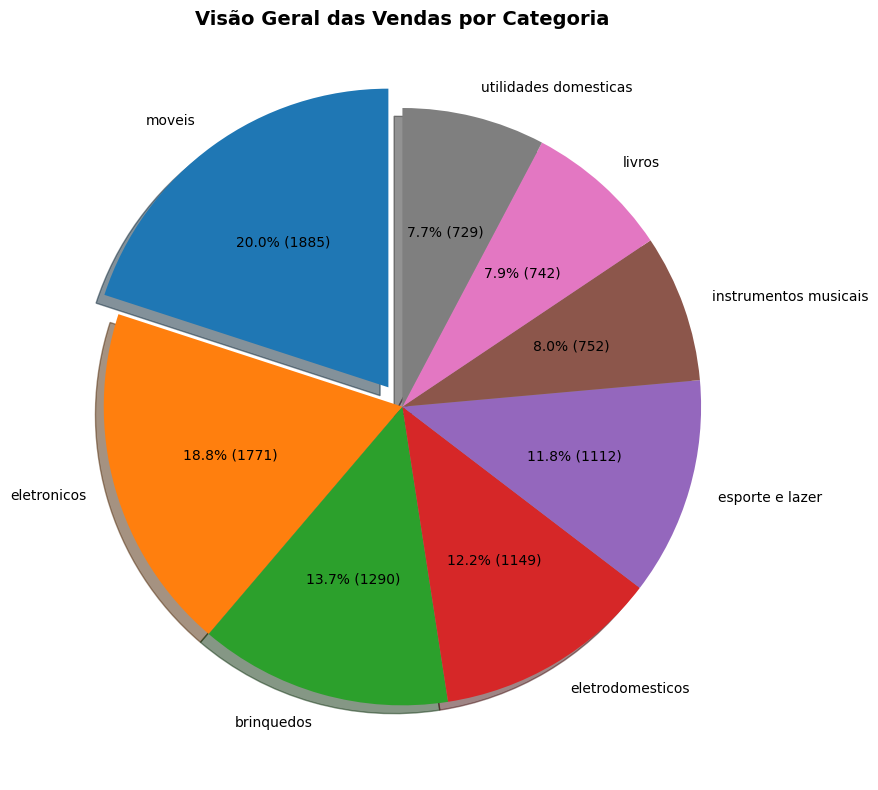

In [5]:
# ===============================
# VISÃO GERAL DAS VENDAS POR CATEGORIA
# ===============================

# Consolida as vendas por categoria de todas as lojas
vendas_por_categoria_total = pd.concat([
    loja['Categoria do Produto'],
    loja2['Categoria do Produto'],
    loja3['Categoria do Produto'],
    loja4['Categoria do Produto']
]).value_counts().sort_values(ascending=False)


# ===============================
# PREPARAÇÃO DOS DADOS
# ===============================
categorias = vendas_por_categoria_total.index.tolist()
valores = vendas_por_categoria_total.values
total_geral = valores.sum()


# ===============================
# GRÁFICO DE PIZZA
# ===============================
plt.figure(figsize=(10, 8))

# Destaca a categoria com maior volume de vendas
explode = [0.08] + [0] * (len(categorias) - 1)

plt.pie(
    valores,
    labels=categorias,
    autopct=lambda p: f'{p:.1f}% ({int(p * total_geral / 100)})',
    startangle=90,
    explode=explode,
    shadow=True
)

plt.title('Visão Geral das Vendas por Categoria', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas


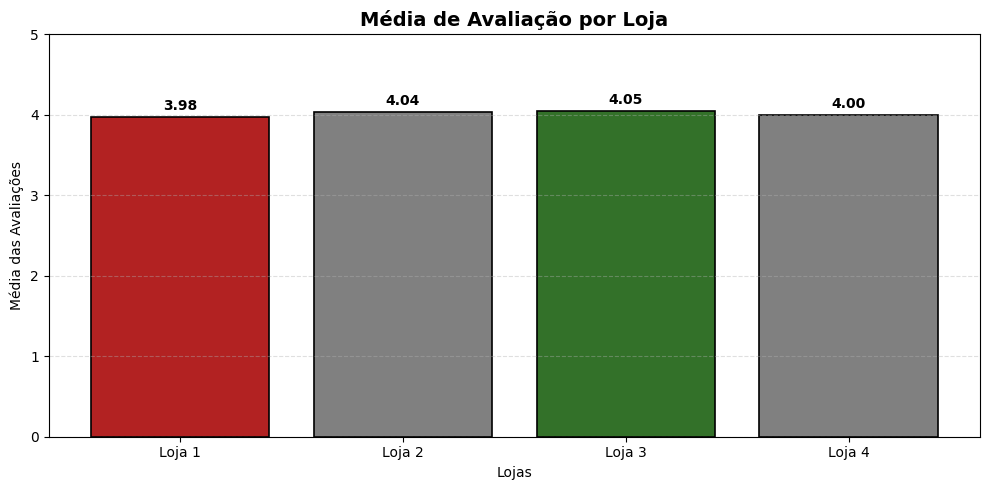

In [8]:
# ===============================
# MÉDIA DE AVALIAÇÃO POR LOJA
# ===============================
import pandas as pd
import matplotlib.pyplot as plt


# ===============================
# CONSOLIDAÇÃO DOS DADOS
# ===============================
df_medias = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Media_Avaliacao': [
        loja['Avaliação da compra'].mean(),
        loja2['Avaliação da compra'].mean(),
        loja3['Avaliação da compra'].mean(),
        loja4['Avaliação da compra'].mean()
    ]
})


# ===============================
# DEFINIÇÃO DAS CORES
# ===============================
# Verde: maior média | Vermelho: menor média | Cinza: demais
cor_maior = '#337129'   # verde (mesmo do primeiro gráfico)
cor_menor = '#B22222'   # vermelho
cor_neutra = '#808080'  # cinza

media_max = df_medias['Media_Avaliacao'].max()
media_min = df_medias['Media_Avaliacao'].min()

cores = [
    cor_maior if media == media_max
    else cor_menor if media == media_min
    else cor_neutra
    for media in df_medias['Media_Avaliacao']
]


# ===============================
# GRÁFICO EM BARRAS
# ===============================
plt.figure(figsize=(10, 5))

barras = plt.bar(
    df_medias['Loja'],
    df_medias['Media_Avaliacao'],
    color=cores,
    edgecolor='black',
    linewidth=1.2
)

plt.title('Média de Avaliação por Loja', fontsize=14, fontweight='bold')
plt.xlabel('Lojas')
plt.ylabel('Média das Avaliações')
plt.ylim(0, 5)

plt.grid(axis='y', linestyle='--', alpha=0.4)


# ===============================
# RÓTULOS DE VALOR
# ===============================
for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        altura + 0.05,
        f'{altura:.2f}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [20]:
# ===============================
# CONSOLIDAÇÃO DOS DADOS
# ===============================
df_lojas = pd.concat(
    dados_lojas,
    names=['Loja']
).reset_index(level='Loja')


# ===============================
# VENDAS TOTAIS POR CATEGORIA
# ===============================
categorias_geral = (
    df_lojas
    .groupby('Categoria do Produto')
    .size()
    .reset_index(name='Vendas Totais')
    .sort_values('Vendas Totais', ascending=False)
)

categorias_geral



,Categoria do Produto,Vendas Totais
6,moveis,1886
2,eletronicos,1772
0,brinquedos,1290
1,eletrodomesticos,1149
3,esporte e lazer,1113
4,instrumentos musicais,753
5,livros,742
7,utilidades domesticas,730


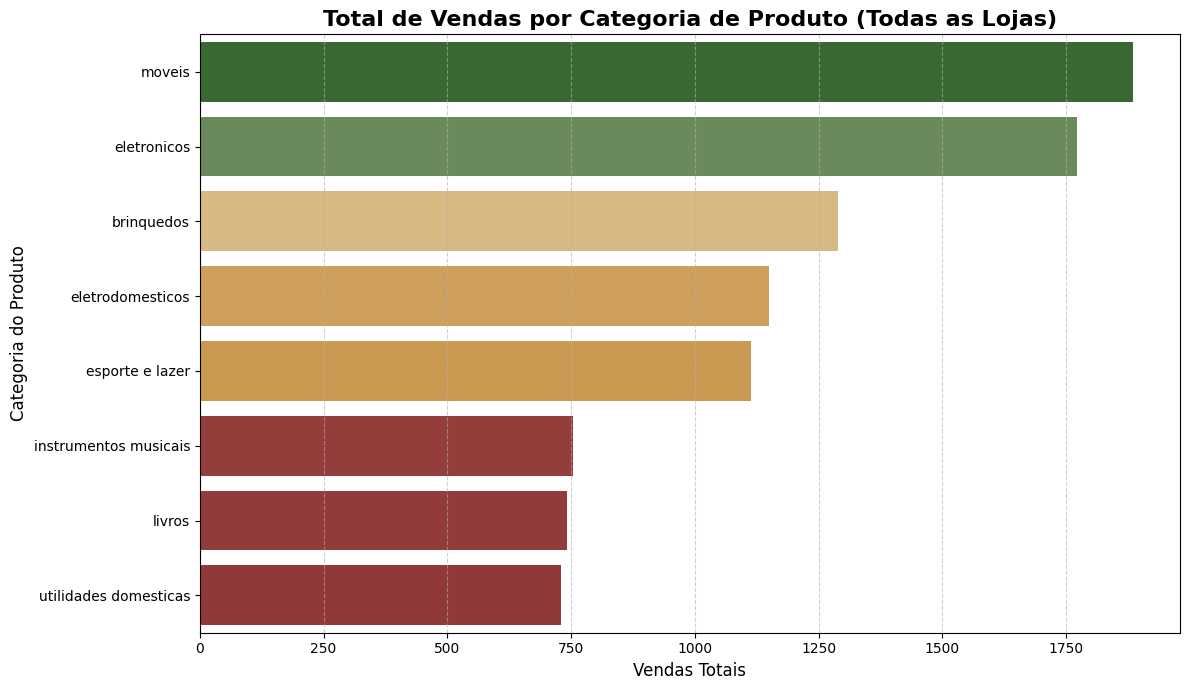

In [19]:
# ===============================
# TOTAL DE VENDAS POR CATEGORIA
# ===============================
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, Normalize


# ===============================
# PREPARAÇÃO DOS DADOS
# ===============================
categorias_geral_ordenado = categorias_geral.sort_values(
    by='Vendas Totais',
    ascending=False
)

valores = categorias_geral_ordenado['Vendas Totais']

# Normalização
norm = Normalize(vmin=valores.min(), vmax=valores.max())


# ===============================
# COLORMAP PROFISSIONAL
# ===============================
cmap_profissional = LinearSegmentedColormap.from_list(
    'desempenho_vendas',
    ['#9E2A2B', '#E09F3E', '#EAE2B7', '#337129']
)

cores_gradiente = [cmap_profissional(norm(v)) for v in valores]


# ===============================
# GRÁFICO DE BARRAS
# ===============================
plt.figure(figsize=(12, 7))

sns.barplot(
    data=categorias_geral_ordenado,
    x='Vendas Totais',
    y='Categoria do Produto',
    hue='Categoria do Produto',   # ← correção oficial
    palette=cores_gradiente,
    legend=False                 # ← evita legenda duplicada
)

plt.title(
    'Total de Vendas por Categoria de Produto (Todas as Lojas)',
    fontsize=16,
    fontweight='bold'
)
plt.xlabel('Vendas Totais', fontsize=12)
plt.ylabel('Categoria do Produto', fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja

In [24]:
# ===============================
# CUSTO MÉDIO DE FRETE POR LOJA
# ===============================

frete_medio_por_loja = (
    df_lojas
    .groupby('Loja')['Frete']
    .mean()
    .reset_index(name='Custo Médio de Frete')
    .round(2)
    .sort_values('Custo Médio de Frete', ascending=False)
)

frete_medio_por_loja

,Loja,Custo Médio de Frete
0,Loja 1,34.69
1,Loja 2,33.62
2,Loja 3,33.07
3,Loja 4,31.28


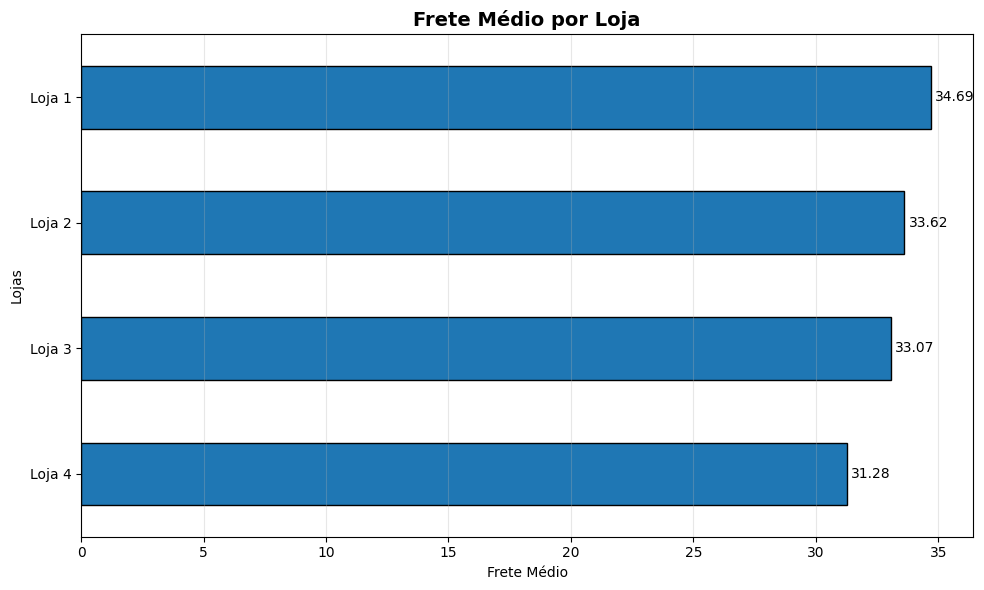

In [27]:
# ===============================
# FRETE MÉDIO POR LOJA
# ===============================
import matplotlib.pyplot as plt


# ===============================
# CÁLCULO DO FRETE MÉDIO
# ===============================
frete_medio_por_loja = (
    df_lojas
    .groupby('Loja')['Frete']
    .mean()
    .round(2)
    .sort_values(ascending=True)  # melhor leitura no gráfico horizontal
)


# ===============================
# GRÁFICO DE BARRAS HORIZONTAIS
# ===============================
ax = frete_medio_por_loja.plot(
    kind='barh',
    figsize=(10, 6),
    color='#1f77b4',        # azul aplicado
    edgecolor='black',
    legend=False
)

plt.title('Frete Médio por Loja', fontsize=14, fontweight='bold')
plt.xlabel('Frete Médio')
plt.ylabel('Lojas')
plt.grid(axis='x', alpha=0.3)


# ===============================
# RÓTULOS DE VALOR
# ===============================
for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.2f',
        label_type='edge',
        padding=3
    )

plt.tight_layout()
plt.show()


# Relatório de Análise das Lojas — Desafio Alura Store

## 1. Contexto do Desafio

Este relatório faz parte do Desafio Alura Store, cujo objetivo é apoiar o Sr. João na decisão de qual loja vender para investir em um novo negócio.

O Sr. João é proprietário de uma rede de quatro lojas do e-commerce Alura Store. Como analista de dados, analisamos o desempenho de cada unidade para identificar qual apresenta os piores resultados relativos, considerando diferentes métricas de negócio.

## 2. Base de Dados e Metodologia

🔹A análise foi desenvolvida no Google Colab, utilizando dados reais fornecidos em arquivos CSV, com apoio das bibliotecas:

Pandas

Matplotlib

Seaborn

🔹As métricas analisadas foram:

Faturamento total por loja

Categorias de produtos mais populares

Produtos mais e menos vendidos

Média de avaliação dos clientes

Custo médio de frete

Esses indicadores permitem avaliar não apenas volume de vendas, mas também qualidade da experiência do cliente e eficiência operacional.

## 3. Análise dos Resultados
🔹 Faturamento Total

Os gráficos mostram que as Lojas 1, 2 e 3 apresentam faturamento superior quando comparadas à Loja 4, indicando maior volume de vendas e melhor desempenho comercial.

A Loja 4 possui o menor faturamento geral, o que já sinaliza uma performance inferior.

🔹 Categorias e Produtos Vendidos

A análise das categorias e dos produtos mais vendidos evidencia que:

As Lojas 1, 2 e 3 concentram maior diversidade e volume de vendas

A Loja 4 apresenta menor participação nas categorias mais populares

Seus produtos aparecem com menos frequência entre os mais vendidos do e-commerce

Isso demonstra menor competitividade da Loja 4 no portfólio geral da Alura Store.

🔹 Avaliação dos Clientes

Embora a Loja 4 apresente avaliações razoáveis, ela não supera de forma consistente as demais lojas. As Lojas 1, 2 e 3 mantêm avaliações iguais ou superiores, aliando volume de vendas a boa experiência do cliente.

🔹 Custo Médio de Frete

A análise do frete mostra que:

A Loja 1 possui custos mais elevados, porém compensa com alto volume de vendas

As Lojas 2 e 3 apresentam bom equilíbrio entre frete e faturamento

A Loja 4 não consegue transformar custos de frete competitivos em maior volume de vendas

Ou seja, mesmo quando o custo não é um obstáculo, a Loja 4 continua apresentando menor desempenho.

## 4. Conclusão e Recomendação

🔹Com base na análise conjunta de todas as métricas, conclui-se que:

A Loja 4 é a unidade com o pior desempenho geral e, portanto, a mais indicada para ser vendida.

🔹Principais motivos:

Menor faturamento total

Menor destaque entre categorias e produtos mais vendidos

Avaliações que não compensam o baixo volume de vendas

Menor competitividade frente às demais lojas

Dessa forma, recomenda-se que o Sr. João venda a Loja 4 e mantenha as Lojas 1, 2 e 3, que demonstram maior potencial de receita, estabilidade e retorno para o negócio.


## 5. Considerações Finais

Este desafio demonstra como a análise de dados é essencial para decisões estratégicas, evitando conclusões baseadas apenas em percepções isoladas.

Ao analisar múltiplas métricas em conjunto, foi possível identificar de forma clara qual loja apresenta o menor desempenho e deve ser descontinuada.